In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
import cv2
from sklearn import svm
from sklearn.model_selection import cross_val_score

from skimage import exposure
from skimage import feature

In [58]:
def compute_hog(image_dir):
    image = cv2.imread(image_dir)
    global H
    #pixels_per_cell=(8, 8), cells_per_block=(2, 2)
    (H, hogImage) = feature.hog(image, orientations=9, pixels_per_cell=(20, 20),
        cells_per_block=(1, 1), transform_sqrt=True, block_norm="L1",
        visualise=True)
    hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
    hogImage = hogImage.astype("uint8")
    plt.imshow(hogImage, 'gray')

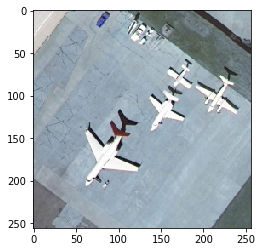

In [59]:
image_dir = 'data/images/UCMerced_LandUse/Images/airplane/airplane00.tif'

image = cv2.imread(image_dir)

plt.imshow(image)

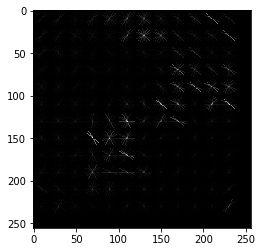

In [60]:
compute_hog(image_dir = image_dir)

In [61]:
H.shape

(1296L,)

In [18]:
hog = cv2.HOGDescriptor()

In [19]:
image_hog = hog.compute(image)

In [20]:
image_hog.shape

(1606500L, 1L)

In [22]:
H

array([0.0215733 , 0.02996707, 0.04686099, ..., 0.02505308, 0.01697696,
       0.03241195])

In [66]:
def compute_hog_save(image_dir):
    N = 0
    image_data = np.empty((2100, 1296))
    for single_dir in os.listdir(image_dir):
        for img in os.listdir(image_dir+single_dir):
            print('Processing image: ', img)
            image = cv2.imread(image_dir+single_dir+'/'+img)
            if image.shape[0] != 256 or image.shape[1] != 256:
                image = cv2.resize(image, (256, 256))
            h, _ = feature.hog(image, orientations=9, pixels_per_cell=(20, 20),
                cells_per_block=(1, 1), transform_sqrt=True, block_norm="L1",
                visualise=True)
            image_data[N] = h.copy()
            N += 1
    return image_data

In [41]:
def compute_hog_save2(image_dir):
    N = 0
    image_data = np.empty((2100, 1606500))
    for single_dir in os.listdir(image_dir):
        for img in os.listdir(image_dir+single_dir):
            print('Processing image: ', img)
            image = cv2.imread(image_dir+single_dir+'/'+img)
            if image.shape[0] != 256 or image.shape[1] != 256:
                image = cv2.resize(image, (256, 256))
            hog = cv2.HOGDescriptor()
            h = hog.compute(image).flatten()
            image_data[N] = h.copy()
            N += 1
    return image_data

In [64]:
def compute_hog_save3(image_dir):
    N = 0
    image_data = np.empty((2100, 34596L))
    for single_dir in os.listdir(image_dir):
        for img in os.listdir(image_dir+single_dir):
            print('Processing image: ', img)
            image = cv2.imread(image_dir+single_dir+'/'+img)
            if image.shape[0] != 256 or image.shape[1] != 256:
                image = cv2.resize(image, (256, 256))
            h, _ = feature.hog(image, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1",
                visualise=True)
            image_data[N] = h.copy()
            N += 1
    return image_data

In [67]:
X = compute_hog_save(image_dir = 'data/images/UCMerced_LandUse/Images/')

('Processing image: ', 'agricultural00.tif')
('Processing image: ', 'agricultural01.tif')
('Processing image: ', 'agricultural02.tif')
('Processing image: ', 'agricultural03.tif')
('Processing image: ', 'agricultural04.tif')
('Processing image: ', 'agricultural05.tif')
('Processing image: ', 'agricultural06.tif')
('Processing image: ', 'agricultural07.tif')
('Processing image: ', 'agricultural08.tif')
('Processing image: ', 'agricultural09.tif')
('Processing image: ', 'agricultural10.tif')
('Processing image: ', 'agricultural11.tif')
('Processing image: ', 'agricultural12.tif')
('Processing image: ', 'agricultural13.tif')
('Processing image: ', 'agricultural14.tif')
('Processing image: ', 'agricultural15.tif')
('Processing image: ', 'agricultural16.tif')
('Processing image: ', 'agricultural17.tif')
('Processing image: ', 'agricultural18.tif')
('Processing image: ', 'agricultural19.tif')
('Processing image: ', 'agricultural20.tif')
('Processing image: ', 'agricultural21.tif')
('Processi

('Processing image: ', 'airplane94.tif')
('Processing image: ', 'airplane95.tif')
('Processing image: ', 'airplane96.tif')
('Processing image: ', 'airplane97.tif')
('Processing image: ', 'airplane98.tif')
('Processing image: ', 'airplane99.tif')
('Processing image: ', 'baseballdiamond00.tif')
('Processing image: ', 'baseballdiamond01.tif')
('Processing image: ', 'baseballdiamond02.tif')
('Processing image: ', 'baseballdiamond03.tif')
('Processing image: ', 'baseballdiamond04.tif')
('Processing image: ', 'baseballdiamond05.tif')
('Processing image: ', 'baseballdiamond06.tif')
('Processing image: ', 'baseballdiamond07.tif')
('Processing image: ', 'baseballdiamond08.tif')
('Processing image: ', 'baseballdiamond09.tif')
('Processing image: ', 'baseballdiamond10.tif')
('Processing image: ', 'baseballdiamond11.tif')
('Processing image: ', 'baseballdiamond12.tif')
('Processing image: ', 'baseballdiamond13.tif')
('Processing image: ', 'baseballdiamond14.tif')
('Processing image: ', 'baseballdi

('Processing image: ', 'beach84.tif')
('Processing image: ', 'beach85.tif')
('Processing image: ', 'beach86.tif')
('Processing image: ', 'beach87.tif')
('Processing image: ', 'beach88.tif')
('Processing image: ', 'beach89.tif')
('Processing image: ', 'beach90.tif')
('Processing image: ', 'beach91.tif')
('Processing image: ', 'beach92.tif')
('Processing image: ', 'beach93.tif')
('Processing image: ', 'beach94.tif')
('Processing image: ', 'beach95.tif')
('Processing image: ', 'beach96.tif')
('Processing image: ', 'beach97.tif')
('Processing image: ', 'beach98.tif')
('Processing image: ', 'beach99.tif')
('Processing image: ', 'buildings00.tif')
('Processing image: ', 'buildings01.tif')
('Processing image: ', 'buildings02.tif')
('Processing image: ', 'buildings03.tif')
('Processing image: ', 'buildings04.tif')
('Processing image: ', 'buildings05.tif')
('Processing image: ', 'buildings06.tif')
('Processing image: ', 'buildings07.tif')
('Processing image: ', 'buildings08.tif')
('Processing i

('Processing image: ', 'chaparral84.tif')
('Processing image: ', 'chaparral85.tif')
('Processing image: ', 'chaparral86.tif')
('Processing image: ', 'chaparral87.tif')
('Processing image: ', 'chaparral88.tif')
('Processing image: ', 'chaparral89.tif')
('Processing image: ', 'chaparral90.tif')
('Processing image: ', 'chaparral91.tif')
('Processing image: ', 'chaparral92.tif')
('Processing image: ', 'chaparral93.tif')
('Processing image: ', 'chaparral94.tif')
('Processing image: ', 'chaparral95.tif')
('Processing image: ', 'chaparral96.tif')
('Processing image: ', 'chaparral97.tif')
('Processing image: ', 'chaparral98.tif')
('Processing image: ', 'chaparral99.tif')
('Processing image: ', 'denseresidential00.tif')
('Processing image: ', 'denseresidential01.tif')
('Processing image: ', 'denseresidential02.tif')
('Processing image: ', 'denseresidential03.tif')
('Processing image: ', 'denseresidential04.tif')
('Processing image: ', 'denseresidential05.tif')
('Processing image: ', 'denseresid

('Processing image: ', 'forest69.tif')
('Processing image: ', 'forest70.tif')
('Processing image: ', 'forest71.tif')
('Processing image: ', 'forest72.tif')
('Processing image: ', 'forest73.tif')
('Processing image: ', 'forest74.tif')
('Processing image: ', 'forest75.tif')
('Processing image: ', 'forest76.tif')
('Processing image: ', 'forest77.tif')
('Processing image: ', 'forest78.tif')
('Processing image: ', 'forest79.tif')
('Processing image: ', 'forest80.tif')
('Processing image: ', 'forest81.tif')
('Processing image: ', 'forest82.tif')
('Processing image: ', 'forest83.tif')
('Processing image: ', 'forest84.tif')
('Processing image: ', 'forest85.tif')
('Processing image: ', 'forest86.tif')
('Processing image: ', 'forest87.tif')
('Processing image: ', 'forest88.tif')
('Processing image: ', 'forest89.tif')
('Processing image: ', 'forest90.tif')
('Processing image: ', 'forest91.tif')
('Processing image: ', 'forest92.tif')
('Processing image: ', 'forest93.tif')
('Processing image: ', 'f

('Processing image: ', 'golfcourse74.tif')
('Processing image: ', 'golfcourse75.tif')
('Processing image: ', 'golfcourse76.tif')
('Processing image: ', 'golfcourse77.tif')
('Processing image: ', 'golfcourse78.tif')
('Processing image: ', 'golfcourse79.tif')
('Processing image: ', 'golfcourse80.tif')
('Processing image: ', 'golfcourse81.tif')
('Processing image: ', 'golfcourse82.tif')
('Processing image: ', 'golfcourse83.tif')
('Processing image: ', 'golfcourse84.tif')
('Processing image: ', 'golfcourse85.tif')
('Processing image: ', 'golfcourse86.tif')
('Processing image: ', 'golfcourse87.tif')
('Processing image: ', 'golfcourse88.tif')
('Processing image: ', 'golfcourse89.tif')
('Processing image: ', 'golfcourse90.tif')
('Processing image: ', 'golfcourse91.tif')
('Processing image: ', 'golfcourse92.tif')
('Processing image: ', 'golfcourse93.tif')
('Processing image: ', 'golfcourse94.tif')
('Processing image: ', 'golfcourse95.tif')
('Processing image: ', 'golfcourse96.tif')
('Processin

('Processing image: ', 'intersection74.tif')
('Processing image: ', 'intersection75.tif')
('Processing image: ', 'intersection76.tif')
('Processing image: ', 'intersection77.tif')
('Processing image: ', 'intersection78.tif')
('Processing image: ', 'intersection79.tif')
('Processing image: ', 'intersection80.tif')
('Processing image: ', 'intersection81.tif')
('Processing image: ', 'intersection82.tif')
('Processing image: ', 'intersection83.tif')
('Processing image: ', 'intersection84.tif')
('Processing image: ', 'intersection85.tif')
('Processing image: ', 'intersection86.tif')
('Processing image: ', 'intersection87.tif')
('Processing image: ', 'intersection88.tif')
('Processing image: ', 'intersection89.tif')
('Processing image: ', 'intersection90.tif')
('Processing image: ', 'intersection91.tif')
('Processing image: ', 'intersection92.tif')
('Processing image: ', 'intersection93.tif')
('Processing image: ', 'intersection94.tif')
('Processing image: ', 'intersection95.tif')
('Processi

('Processing image: ', 'mobilehomepark44.tif')
('Processing image: ', 'mobilehomepark45.tif')
('Processing image: ', 'mobilehomepark46.tif')
('Processing image: ', 'mobilehomepark47.tif')
('Processing image: ', 'mobilehomepark48.tif')
('Processing image: ', 'mobilehomepark49.tif')
('Processing image: ', 'mobilehomepark50.tif')
('Processing image: ', 'mobilehomepark51.tif')
('Processing image: ', 'mobilehomepark52.tif')
('Processing image: ', 'mobilehomepark53.tif')
('Processing image: ', 'mobilehomepark54.tif')
('Processing image: ', 'mobilehomepark55.tif')
('Processing image: ', 'mobilehomepark56.tif')
('Processing image: ', 'mobilehomepark57.tif')
('Processing image: ', 'mobilehomepark58.tif')
('Processing image: ', 'mobilehomepark59.tif')
('Processing image: ', 'mobilehomepark60.tif')
('Processing image: ', 'mobilehomepark61.tif')
('Processing image: ', 'mobilehomepark62.tif')
('Processing image: ', 'mobilehomepark63.tif')
('Processing image: ', 'mobilehomepark64.tif')
('Processing 

('Processing image: ', 'parkinglot34.tif')
('Processing image: ', 'parkinglot35.tif')
('Processing image: ', 'parkinglot36.tif')
('Processing image: ', 'parkinglot37.tif')
('Processing image: ', 'parkinglot38.tif')
('Processing image: ', 'parkinglot39.tif')
('Processing image: ', 'parkinglot40.tif')
('Processing image: ', 'parkinglot41.tif')
('Processing image: ', 'parkinglot42.tif')
('Processing image: ', 'parkinglot43.tif')
('Processing image: ', 'parkinglot44.tif')
('Processing image: ', 'parkinglot45.tif')
('Processing image: ', 'parkinglot46.tif')
('Processing image: ', 'parkinglot47.tif')
('Processing image: ', 'parkinglot48.tif')
('Processing image: ', 'parkinglot49.tif')
('Processing image: ', 'parkinglot50.tif')
('Processing image: ', 'parkinglot51.tif')
('Processing image: ', 'parkinglot52.tif')
('Processing image: ', 'parkinglot53.tif')
('Processing image: ', 'parkinglot54.tif')
('Processing image: ', 'parkinglot55.tif')
('Processing image: ', 'parkinglot56.tif')
('Processin

('Processing image: ', 'runway44.tif')
('Processing image: ', 'runway45.tif')
('Processing image: ', 'runway46.tif')
('Processing image: ', 'runway47.tif')
('Processing image: ', 'runway48.tif')
('Processing image: ', 'runway49.tif')
('Processing image: ', 'runway50.tif')
('Processing image: ', 'runway51.tif')
('Processing image: ', 'runway52.tif')
('Processing image: ', 'runway53.tif')
('Processing image: ', 'runway54.tif')
('Processing image: ', 'runway55.tif')
('Processing image: ', 'runway56.tif')
('Processing image: ', 'runway57.tif')
('Processing image: ', 'runway58.tif')
('Processing image: ', 'runway59.tif')
('Processing image: ', 'runway60.tif')
('Processing image: ', 'runway61.tif')
('Processing image: ', 'runway62.tif')
('Processing image: ', 'runway63.tif')
('Processing image: ', 'runway64.tif')
('Processing image: ', 'runway65.tif')
('Processing image: ', 'runway66.tif')
('Processing image: ', 'runway67.tif')
('Processing image: ', 'runway68.tif')
('Processing image: ', 'r

('Processing image: ', 'storagetanks24.tif')
('Processing image: ', 'storagetanks25.tif')
('Processing image: ', 'storagetanks26.tif')
('Processing image: ', 'storagetanks27.tif')
('Processing image: ', 'storagetanks28.tif')
('Processing image: ', 'storagetanks29.tif')
('Processing image: ', 'storagetanks30.tif')
('Processing image: ', 'storagetanks31.tif')
('Processing image: ', 'storagetanks32.tif')
('Processing image: ', 'storagetanks33.tif')
('Processing image: ', 'storagetanks34.tif')
('Processing image: ', 'storagetanks35.tif')
('Processing image: ', 'storagetanks36.tif')
('Processing image: ', 'storagetanks37.tif')
('Processing image: ', 'storagetanks38.tif')
('Processing image: ', 'storagetanks39.tif')
('Processing image: ', 'storagetanks40.tif')
('Processing image: ', 'storagetanks41.tif')
('Processing image: ', 'storagetanks42.tif')
('Processing image: ', 'storagetanks43.tif')
('Processing image: ', 'storagetanks44.tif')
('Processing image: ', 'storagetanks45.tif')
('Processi

In [68]:
y = np.array([i for i in range(21) for _ in range(100)])

In [69]:
np.save('data/all_images_HOG_features_paper.npy', X)

In [70]:
train_indexs = np.load('data/train_index.npy')

In [71]:
X_train, X_test, y_train, y_test = X[train_indexs], X[-train_indexs], y[train_indexs], y[-train_indexs]

In [72]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1260L, 1296L), (1260L,), (1260L, 1296L), (1260L,))

## 4. 五折交叉验证模型性能

In [73]:
clf1 = svm.SVC(kernel='linear', C=1)

In [74]:
scores = cross_val_score(clf1, X_train, y_train, cv=5)

In [75]:
scores

array([0.37307692, 0.40784314, 0.43650794, 0.43145161, 0.3755102 ])

In [76]:
scores.mean()

0.404877962764924

In [77]:
scores.std()

0.02679245324986269

## 5. 构建支持向量机分类模型

In [78]:
clf2 = svm.SVC(kernel='linear', C=1)

In [79]:
clf2.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
clf2.score(X_test, y_test)

0.7611111111111111

In [81]:
clf2.score(X_train, y_train)

0.9968253968253968